In [6]:
import numpy as np
import matplotlib.pyplot as plt
import PIL as pil
from scipy.integrate import solve_ivp

---
## Zadanie 1
Wyznacz ręcznie pary własne (wyniki potwierdź obliczeniami komputerowymi):

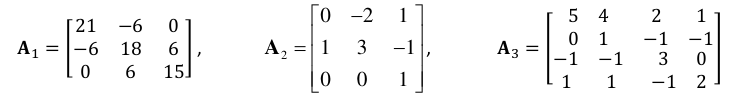

Sprawdź czy ślad macierzy jest równy sumie jej wartości własnych. Które macierze są diago-
nalizowalne i dlaczego? Czy któraś z tych macierzy jest osobliwa?

---
W celu wyznaczenia wartości własnych należy rozwiązać poniższe rówanie:
$$ det \boldsymbol{(A-\lambda I)} = 0 $$

    Rozwiązanie ręczne:

    Rozwiązanie komputerowe:

In [3]:
A1 = np.array( [ [21, -6, 0],
                 [-6, 18, 6],
                 [0, 6, 15] ] )

A2 = np.array( [[0, -2, 1],
                [1, 3, -1],
                [0, 0,  1] ]) 

A3 = np.array( [ [5, 4, 2, 1],
                [0, 1, -1, -1],
                [-1, -1, 3, 0],
                [1, 1, -1, 2]])

# w,v = np.linalg.eig(a)  - Wyznacza wartości własne oraz wektor własny
# w - wartości własne
# v - wektor własny

print("Wartości własne dla A1:")
print(np.linalg.eig(A1)[0])

print("Wartości własne dla A2:")
print(np.linalg.eig(A2)[0])

print("Wartości własne dla A3:")
print(np.linalg.eig(A3)[0])

Wartości własne dla A1:
[27. 18.  9.]
Wartości własne dla A2:
[1. 2. 1.]
Wartości własne dla A3:
[4. 4. 1. 2.]


---
## Zadanie 2

Wyznacz największą i najmniejszą wartość własną stosując metodę Powera:

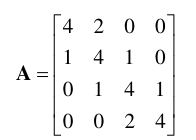

---
#### Metoda potęgowa
Można ją stosować dla znajdowania wartości własnej o największym module
i odpowiadającego jej wektora własnego.


$$ b_{k+1}={\frac {Ab_{k}}{\|Ab_{k}\|}}  (1)$$

gdzie:

$ \boldsymbol{A} $ - macierz, która ma n różnych rzeczywistych wartości własnych

$ b_{0} $ - wektor losowy 


Wyznaczenie maksymalnej wartości własnej: 
$$ \rho (A)=\max \left\{|\lambda _{1}|,\dotsc ,|\lambda _{n}|\right\}={\frac {b_{k}^{\top }Ab_{k}}{b_{k}^{\top }b_{k}}}={\frac {b_{k+1}^{\top }b_{k}}{b_{k}^{\top }b_{k}}} (2)$$


In [4]:
def normalization(A):
    return np.abs(A)/np.max(A) # Normalizacja

def PowerMethod(A, n=10):
    b_k = np.random.rand(A.shape[1]) # Wygenerowanie wektora losowego
    for _ in range(n-1):
        b_k = normalization(A @ b_k) # Realizacja wzoru (1) wraz z normalizacja
        
    lmb = (b_k.T@A@b_k)/(b_k.T@b_k)   # Wyznacznie lambda (2)
    return lmb

A = np.array([[4,2,0,0],
              [1,4,1,0],
              [0,1,4,1],
              [0,0,2,4]])

print("Maksymalna wartość własna: ",end="")
print(PowerMethod(A))

print("Minimalna wartość własna: ",end="")
print(PowerMethod(np.linalg.inv(A)))

Maksymalna wartość własna: 5.999245380876908
Minimalna wartość własna: 0.23395514402903944


#### Wnioski

---
## Zadanie 3

Rozwiąż układ równań różniczkowych zwyczajnych:

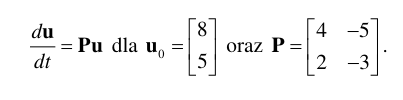

---
#### Metoda Eulera rozwiązywania układu równań 
Dla układu:
$$\boldsymbol{y'=Ay} (1)$$
Szukane rozwiązania niezerowe w postaci
$$ \boldsymbol{y}(t)=e^{\lambda t}\boldsymbol{v}, v \in R^n, \lambda \in R (2)$$
Z równań (1) i (2):
$$ \lambda e^{\lambda t}\boldsymbol{v} = \boldsymbol{A}e^{\lambda t}\boldsymbol{v} \iff \boldsymbol{(A-\lambda I)v}=0$$
Otrzymany układ równań posiada rozwiązanie niezerowe, gdy wyznacznik macierzy głównej układu jest równy zeru tzn.
$$ det \boldsymbol{(A-\lambda I)} = 0 $$


<div>
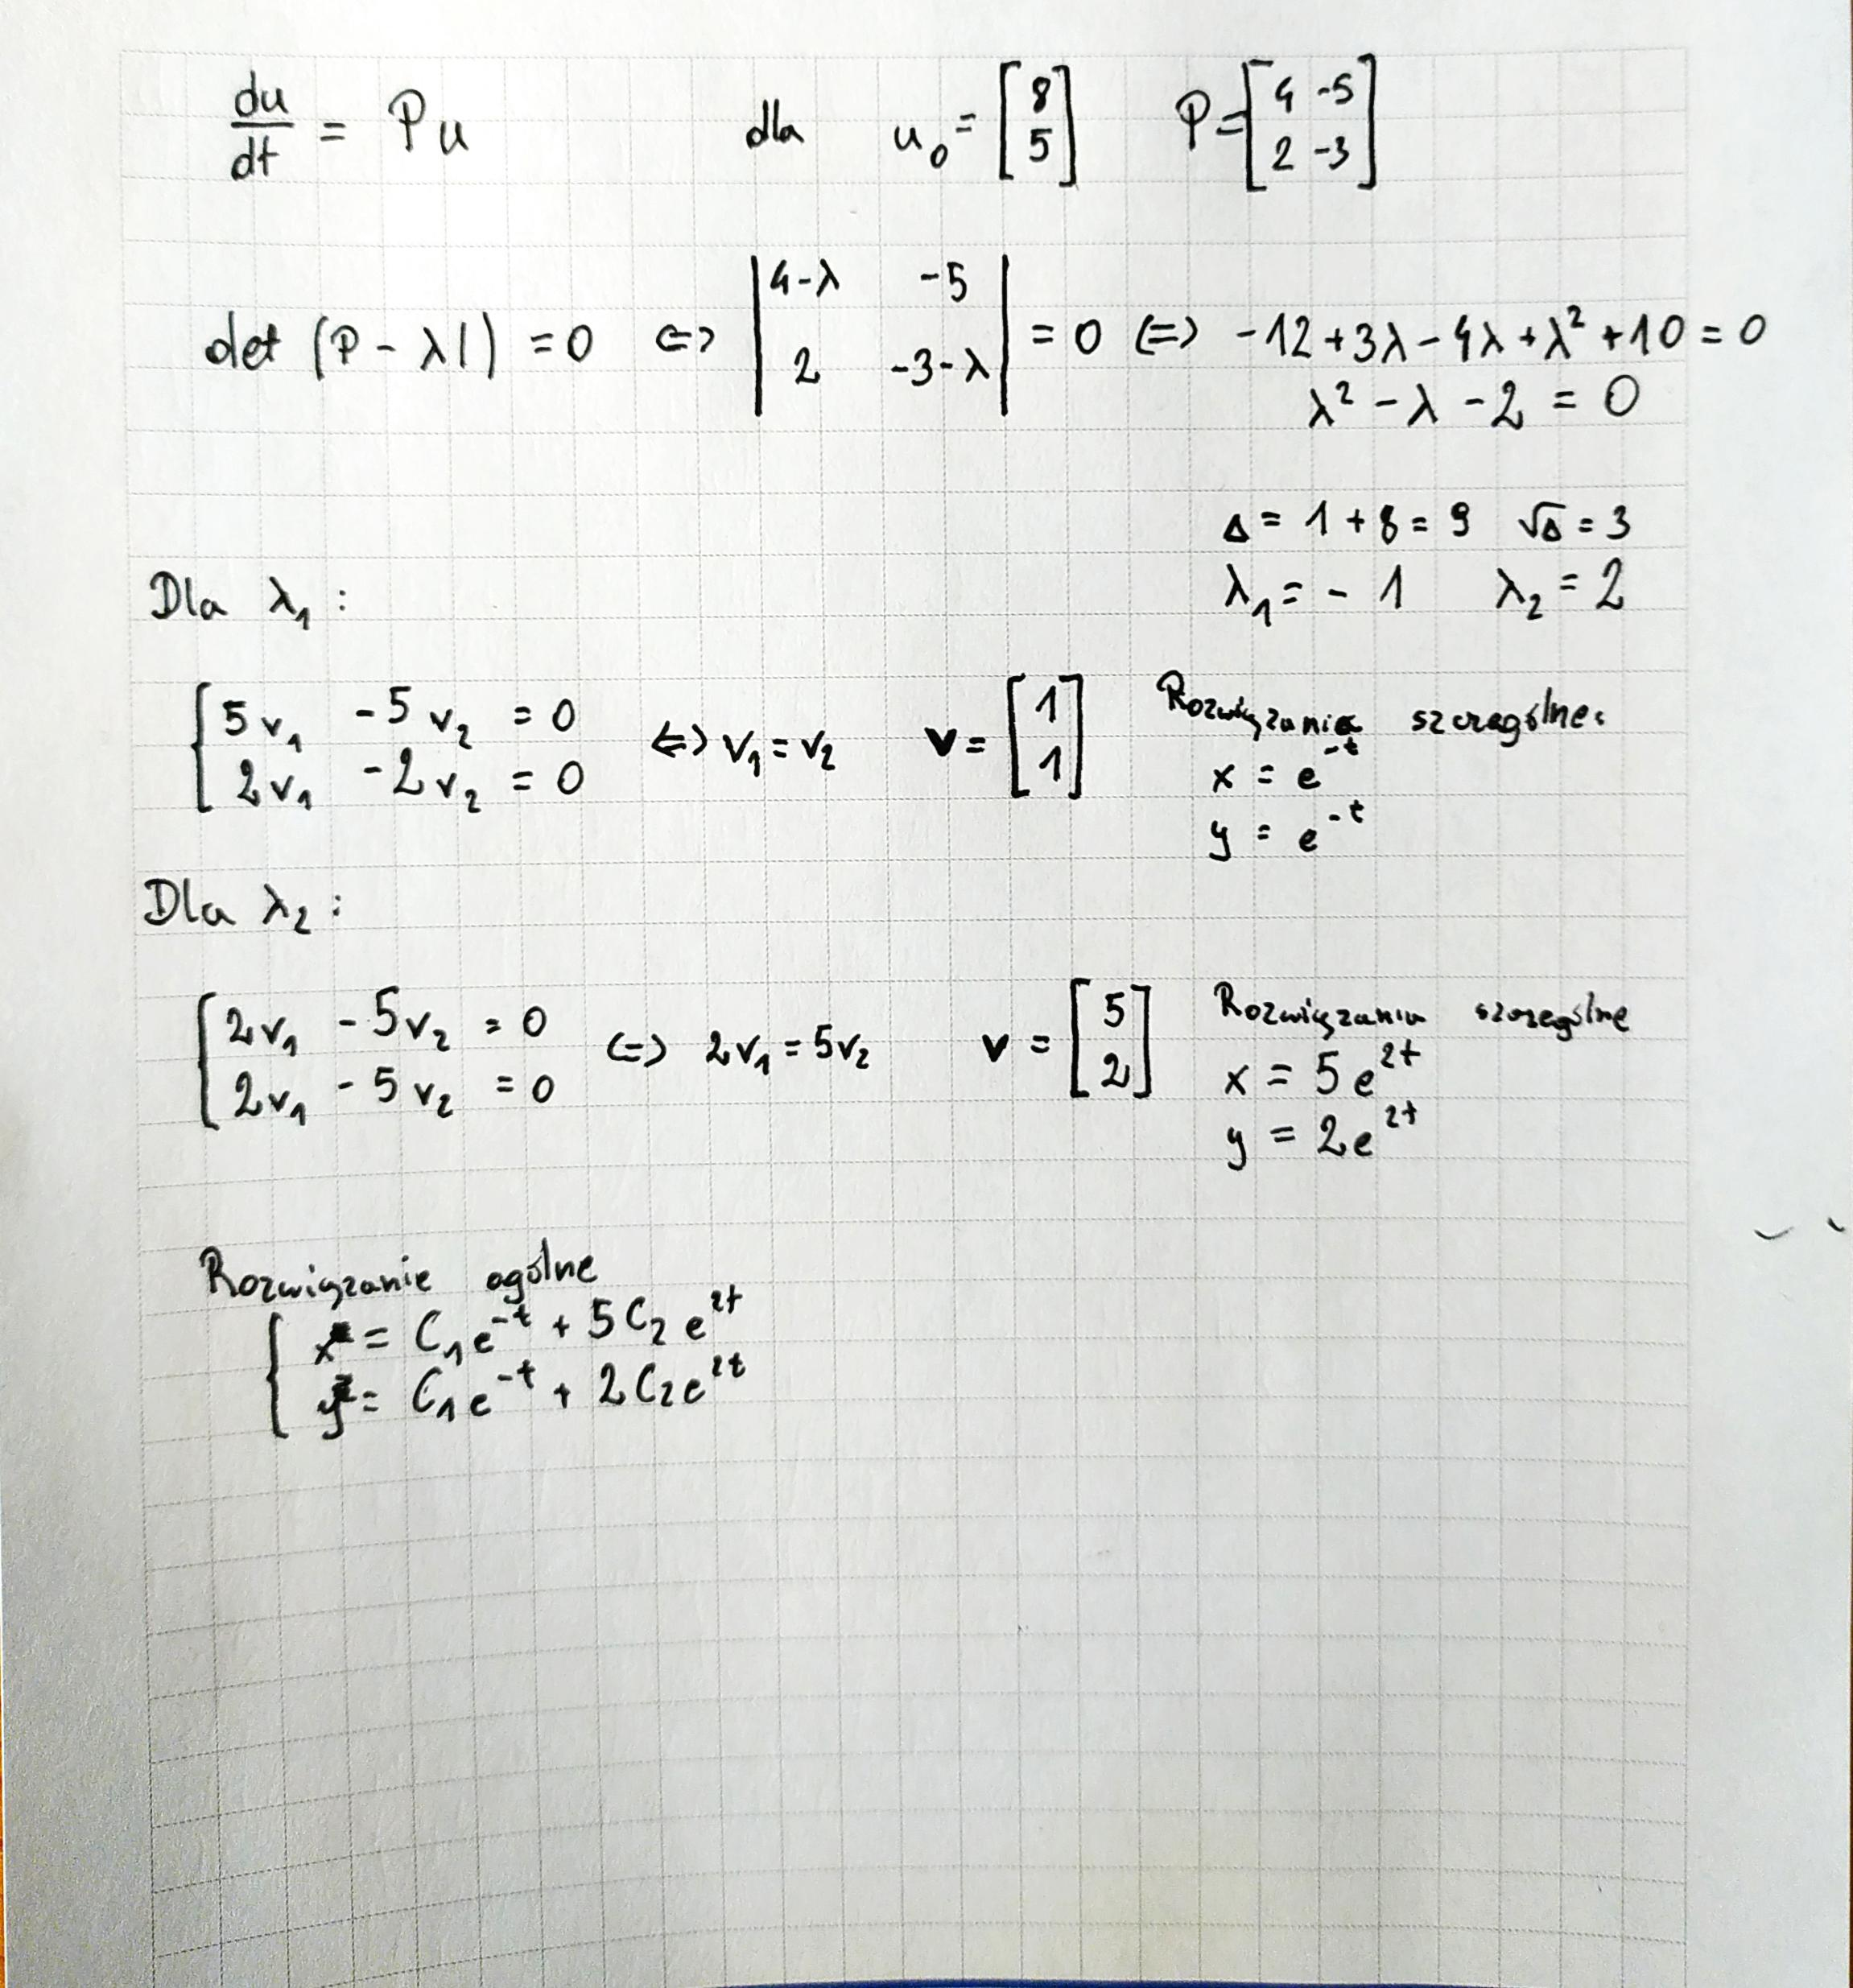
</div>


---
## Zadanie 4

Wyznacz $A^{100}$ metodą diagonalizacji macierzy

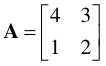

In [23]:
A = np.array([[4,3],
              [1,2]])

np.linalg.eig(A)

(array([12.,  4.,  8.]),
 array([[0.9486833 , 0.31622777, 0.57735027],
        [0.31622777, 0.9486833 , 0.57735027],
        [0.        , 0.        , 0.57735027]]))

---
## Zadanie 5

Wykreśl dyski Gershgorina i określ lokalizację wartości własnych macierzy:

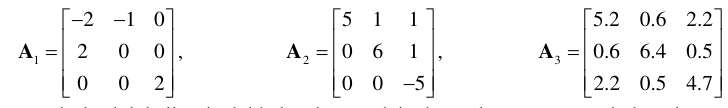

Zaznacz na dyskach lokalizację dokładnych wartości własnych wyznaczonych dowolną metodą.


---
#### Dyski Gershgorina
Twierdzenie Gerszgorina: każda wartość własna macierzy $\boldsymbol{A}$ leży wewnątrz lub na brzegu przynajmniej jednego z kół $D(a_{ii},R_{i})$

$$ R_{i} = \sum _{j\neq i}|a_{ij}|$$


gdzie:

$a_{ii}$ - środek okręgu,

$R_{i}$ - promień okręgu

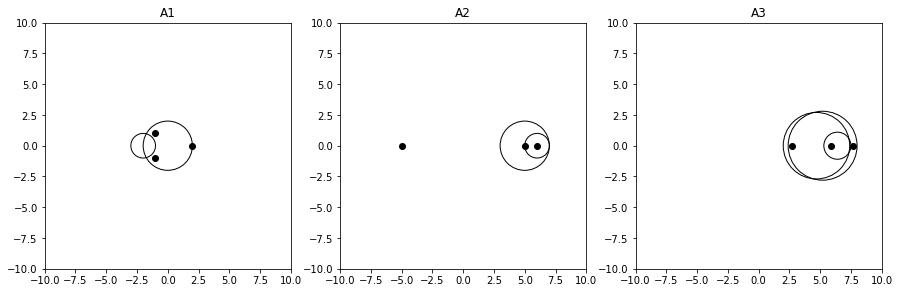

In [105]:
A1 = np.array([[-2,-1,0],
               [2,0,0],
               [0,0,2]])

A2 = np.array([[5,1,1],
               [0,6,1],
               [0,0,-5]])

A3 = np.array([[5.2,0.6,2.2],
               [0.6,6.4,0.5],
               [2.2,0.5,4.7]])

A = [A1, A2, A3]

def GershgorinDiscs(A):
    center = np.diagonal(A)                            # Środek okręgu - wartosci na diagonali
    radius = np.sum(np.abs(A),axis=1) - np.abs(center) # Promien okregu - suma po wierszach - wartosc na diagonali
    return center, radius


plt.rcParams['figure.figsize'] = [15, 8]
fig, ax = plt.subplots(1, 3)

for i in range(3):
    eig = np.linalg.eig(A[i])[0]            # Wartości wałsne
    center, radius = GershgorinDiscs(A[i])  # Wywołanie funkcji wyznaczającej okręgki
    
    # Ustawienie do wydruku
    ax[i].set_title("A"+str(i+1))
    ax[i].set_aspect(1)
    ax[i].set_xlim([-10,10])
    ax[i].set_ylim([-10,10])
    ax[i].scatter(eig.real,eig.imag,c="black")
    for j in range(center.size):
        ax[i].add_artist(plt.Circle((center[j], 0), radius[j], fill=False))


plt.show()

#### Wnioski
Jak można zaobserować dyski Gershgorina wyznaczają ograniczenia przedziału w jakim mogą znajdować się wartości własne macierzy. W przypadku A1 oraz A2 widoczne są tylko 2 okręgi wynika to z faktu, iż w poszczególnych wierszach wartość znajduje się tylko na diagonali, co bezposrednio wskazuje wartość własną.

---
## Zadanie 6

Wyznacz rozkład SVD macierzy (bez użycia funkcji „svd”):

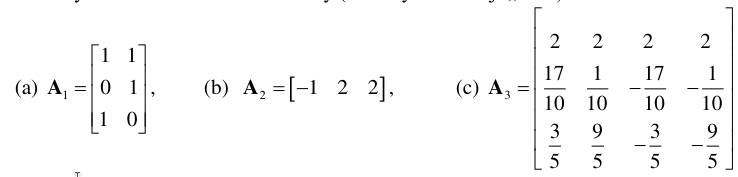

Wyniki obliczeń porównaj z obliczeniami komputerowymi wykorzystującymi funkcję „svd”.

---
#### Rozkład według wartości osobliwych SVD (Singular Value Decomposition)
Jest to dekompozycja macierzy na iloczyn trzech specyficznych macierzy.

Każdą macierz rzeczywistą $\boldsymbol{A}$ można przedstawić w postaci rozkładu SVD: 
$$A=U\Sigma V^{T}$$

gdzie:

$U$ i $V$ - macierze ortogonalne,

$\Sigma$ - macierz diagonalna ($\Sigma =\operatorname {diag} (\sigma _{i})$), $\sigma _{i}$ - nieujemne wartości osobliwe.




<div>
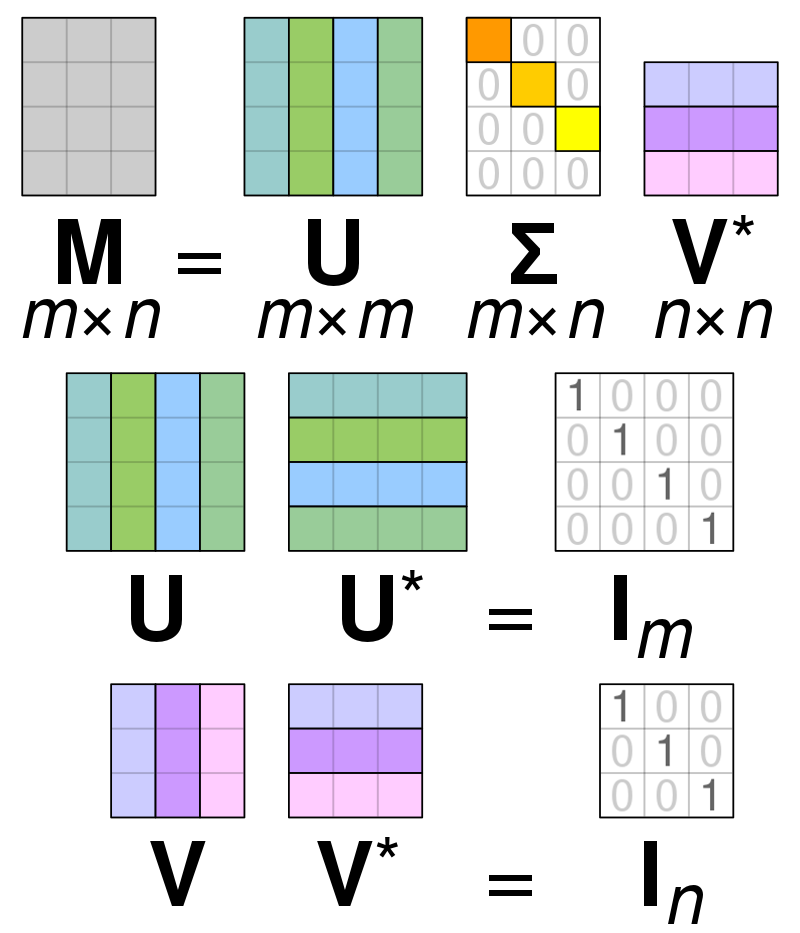
</div>

In [121]:
A1 = np.array([[1,1],
               [0,1],
               [1,0]])

A2 = np.array([[-1,2,2]])

A3 = np.array([[2,2,2,2],
               [17/10,1/10,-17/10,-1/10],
               [3/5,9/5,-3/5,-9/5]])

A = [A1,A2,A3]

for i in range(3):
    u, s, vh = np.linalg.svd(A[i])
    print("Macierz A"+str(i)+": ")
    print(u)
    print(s)
    print(vh)

Macierz A0: 
[[-8.16496581e-01 -1.85577521e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [-4.08248290e-01  7.07106781e-01  5.77350269e-01]]
[1.73205081 1.        ]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
Macierz A1: 
[[1.]]
[3.]
[[-0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]
 [ 0.66666667 -0.33333333  0.66666667]]
Macierz A2: 
[[ 1.00000000e+00 -2.22044605e-17  1.66533454e-17]
 [ 0.00000000e+00  6.00000000e-01  8.00000000e-01]
 [ 2.77555756e-17  8.00000000e-01 -6.00000000e-01]]
[4. 3. 2.]
[[ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]
 [-0.5  0.5 -0.5  0.5]]


---
## Zadanie 7

Przekształć dowolny obraz (z Internetu) do macierzy o wymiarach 640 x 400 (stan-
dard VGA), a następnie przeskaluj wartości elementów aby: 0 <= x <= 1 ; gdzie x = 0 odpowiada
poziomowi czerni, x = 1 to poziom bieli. Wyznacz SVD takiej macierzy wykorzystując dowolnej implementację algorytmu SVD. Następnie utwórz obraz z faktorów dla następujących
przypadków: 10; 20 oraz 40 wartości osobliwych i odpowiadającym im wektorów osobliwych.


Zdjecie oryginalne


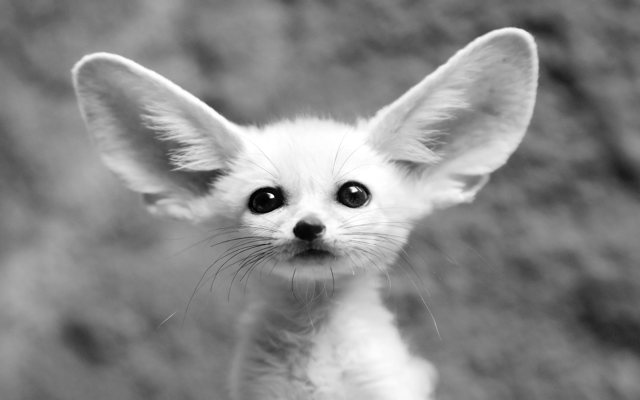

10 wektorow osobliwych. Kompresja: 95.93 %


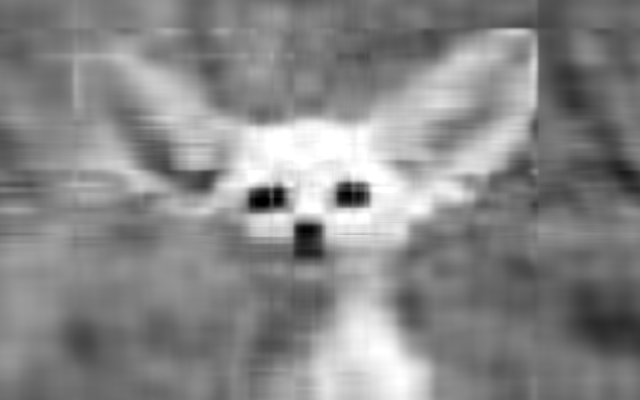

20 wektorow osobliwych. Kompresja: 91.87 %


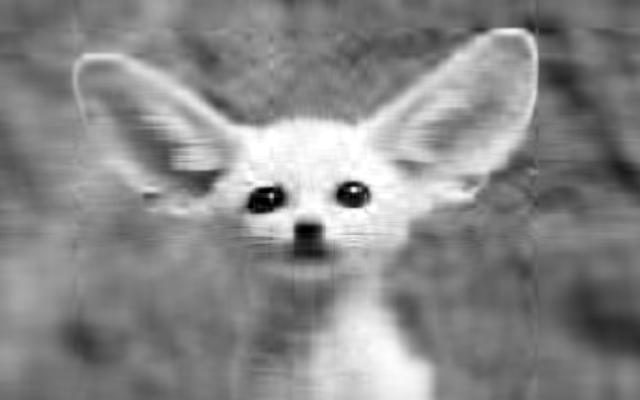

40 wektorow osobliwych. Kompresja: 83.73 %


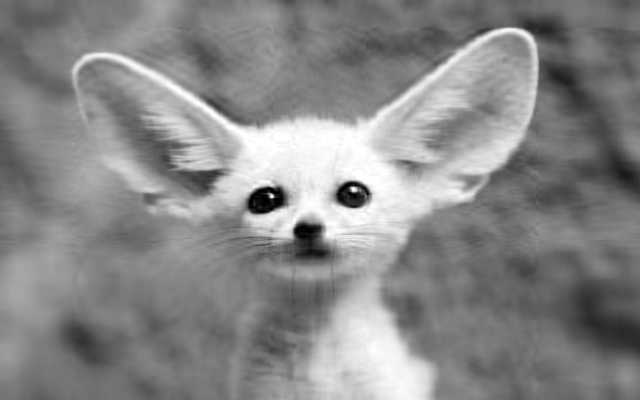

In [26]:
img = pil.Image.open("./images/list2/example_img.jpg") # Wczytanie zdjecia
img = img.convert('L')       # Przekształcenie do odcieni szarosci
img = img.resize((640,400))  # Przeskalowanie obrazu do wymiaru 640x400

img_np = np.array(img)  # Przekształcenie do macierzy 
img_np = img_np/np.max(img_np) # Przeskalowanie [0,1]

U, S, VH = np.linalg.svd(img_np)  # Wyznaczenie SVD
default = np.size(img_np)


images = []
compression = []
values = [10,20,40]
for value in values:
    factored = U[:,:value] @ np.diag(S[:value]) @ VH[:value,:]
    compression.append(100-
        ((np.size(U[:,:value])+np.size(S[:value])+np.size(VH[:value,:]))/
        default)*100)
    images.append(pil.Image.fromarray(factored*255).convert("RGB"))

print("Zdjecie oryginalne")
display(img)
for i in range(len(values)): 
    print(str(values[i])+" wektorow osobliwych. Kompresja: ", end="")
    print(round(compression[i],2),"%")
    display(images[i])

#### Wnioski
Metodę SVD można wykorzystywać w procesach przetwarzania sygnałów w tym obrazów. Wykożystując możliwość redukcji wymiaru macierzy.